# Distributions and Measures of Dispersion
This notebook contains the code for calculating and plotting distributions and Measures of Dispersion. These subjects were covered in the workshops for the minor Data Science. Since not everyone is familiar with Python, or didn't use it during the lectures, I decided to share the code I've written and methods I've used to calculate things like the Standard Deviation and Variance.

**NOTE: this is not a final version, also, not everything covered in the lectures may be included in this document.**
**ALSO NOTE: I'm not a Python guru, most of the code will not be optimal nor will it be free of 'hacks'.**

## Introduction
This notebook contains python code that can be executed live. This means that if you were to clone this repository by issuing the following command: (assuming you have git installed https://git-scm.com/book/en/v2/Getting-Started-Installing-Git (which should've been named getgit.com but w/e))

    git clone https://github.com/roelvanendhoven/minor-datascience.git
    
You can then replace the `Sample.tsv` file with a Sample file (correctly formatted) the values within this notebook will reflect the new sample file. To do so the notebook has to be re-run. Google will help you a long way.

Also, to install Jupyter, the easiest way would be to install the Anaconda Python distribution: https://www.continuum.io/downloads which contains Jupyter by default. Also it installs a lot of python packages used for plotting and doing data science out of the box and preconfigured.

## Things covered so far
The notebook currently covers the following things:

* Plot number of samples and the mean of the number of samples

* Poisson Distribution of the number of Samples (where the organisms were randomly divided)
* Standard deviation of the Number of organisms
* Variance of the Number of organisms


## Imports and opening the file
The following code handles the imports and dependencies on which our code relies. We depend on matplotlib to draw our graphs and we call it `plt` by convention. We use pandas for our data manipulation and reading our data file. We name this `pd`, as is also the convention.

After that we open our file with the sample data and display the first few values. It is loaded in as a pandas DataFrame.

In [2]:
import pandas as pd # because they're cute
import matplotlib.pyplot as plt # To plot the graphs
import math # So we don't have to do it ourself

# Surpress warnings, cuz we're living on the edge
pd.options.mode.chained_assignment = None

# Just surpress all warnings, I don't even care anymore :')
import warnings
warnings.filterwarnings("ignore")

data = pd.DataFrame.from_csv('Sample.tsv', sep='\t') #load tab separated values ( '\t' )

print(data.head()) # Print the head of the dataset, or the first 5 values

              SamplerDiameter(cm)  setDensityOfOrganisms (m2)  \
SampleNumber                                                    
1                              25                          10   
1                              25                          10   
1                              25                          10   
2                              25                          10   
2                              25                          10   

             DistributionPattern  NumberOfOrganisms  
SampleNumber                                         
1                        Regular                  6  
1                        Clumped                  2  
1                         Random                  5  
2                        Regular                  4  
2                        Clumped                  9  


## Describing and plotting the samples
Now that we have successfully loaded the dataset, let's initially describe our data so we can find the mean and standard deviation. Using the describe function shows a lot of information about your data quickly. Nexy we create a boxplot to visualise what we have described. This gives an even better look at our data. We group this by the different distribution patterns so we can compare them and inspect them individually.

Should we draw a line or bargraph with this information, we would be none the wiser since it would just show a bunch of 'noise'.

DistributionPattern       
Clumped              count    500.000000
                     mean       4.980000
                     std        2.562955
                     min        0.000000
                     25%        3.000000
                     50%        5.000000
                     75%        7.000000
                     max       13.000000
Random               count    500.000000
                     mean       5.620000
                     std        2.346617
                     min        1.000000
                     25%        4.000000
                     50%        5.000000
                     75%        7.000000
                     max       13.000000
Regular              count    500.000000
                     mean       5.630000
                     std        0.924559
                     min        4.000000
                     25%        5.000000
                     50%        6.000000
                     75%        6.000000
                     max      

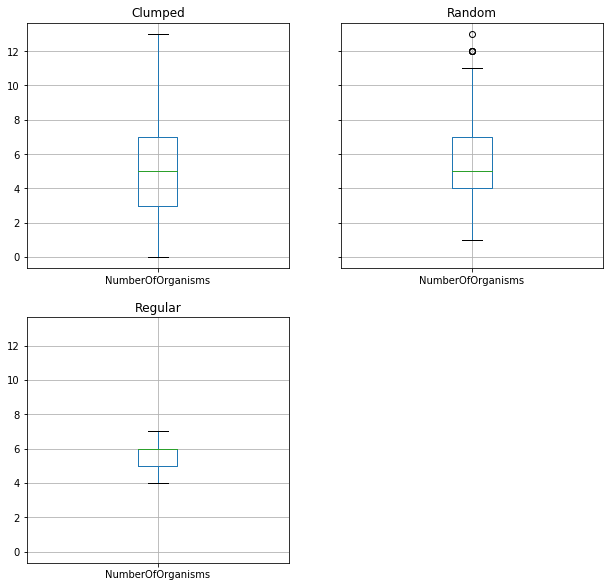

In [3]:
fig, ax = plt.subplots(figsize=(10,10)) # obtain the figure and axis of the subplots in matplotlib

grouped_data = data.groupby('DistributionPattern') # Group data
print(grouped_data['NumberOfOrganisms'].describe()) # Show some statistics about the different grouped data

grouped_data.boxplot(ax=ax,  column='NumberOfOrganisms') # Pandas has a convenient wrapper function to make boxplots
plt.show()

## Plotting the Distribution
To find out if the sample conforms to a certain distribution it can be tested against a chi-square test. The following code gives an example of calculating the poisson distribution of the sample data, aswell as providing a function to calculate the chi-sqaure score.

One of the ditribution patterns follows a Poisson distribution, namely the random one. This is also one of the characteristics of a poisson distribution. It applies to random chance. Seeing as the amount of organisms within a sample is random, we can conclude this distribution indeed applies. Indeed, when we plot the distribution and calculate the chi-square score, we find a that the poisson distribution apllies very strongly.

The example starts by loading the dataset again, because the code was written before the rest of the notebook (being the code above this part). As such it will follow a different approach to filtering and grouping the data. I left this in seeing as the method described above provide but an alternate approach to a problem and it might be usefull to see a different approach.

The rest of the code is explained in comments below. After which a more general explanation of the functions used is given, namely the ones about the poisson distribution and the chi-square test.

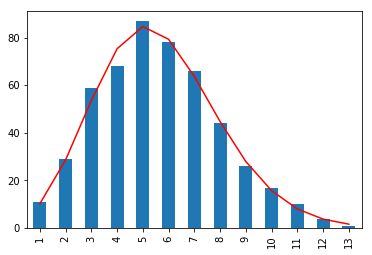

In [4]:

sample = pd.DataFrame.from_csv('Sample.tsv', sep='\t', index_col=None)
reg = sample.loc[sample['DistributionPattern'] == 'Random']

fig, ax = plt.subplots()
val_counts = reg['NumberOfOrganisms'].value_counts(sort=False)

mean_organisms = reg['NumberOfOrganisms'].mean()
std_organisms = reg['NumberOfOrganisms'].std()

euler = math.exp(1)
poisson_list = []

for value, count in val_counts.items():
    p = (mean_organisms ** value * euler ** -mean_organisms) / (math.factorial(value))
    p *= 500
    poisson_list.append(p)

value_counts = [value for value in val_counts]

chi_square = 0
for value, predicted in zip(value_counts, poisson_list):
    chi_square += ((value - predicted) ** 2) / predicted


val_counts.plot(ax=ax, kind='bar')
ax.plot(poisson_list, color='red')
plt.show()